### Dimensionality Reduction - PCA

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data.

In this exercise, we will do the following:

1. Apply dimensionality reduction technique PCA (Principle Component Analysis) on the load_digits() dataset. Use the sklearn inbuilt tool sklearn.decomposition.PCA
2. Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the amount of information thrown away and plot the variance(cumulative) against the number of components
3. Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA as well 

In [9]:
from sklearn.datasets import load_digits
import pylab as pl 
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
from sklearn.decomposition import PCA

## Get data
digits = load_digits()

## Create data and Target and Run PCA
X,y = digits.data, digits.target
pca_digits=PCA()

## Print the shape of the original data and after application of PCA without modification
X_proj = pca_digits.fit_transform(X)
print X.shape, X_proj.shape

(1797, 64) (1797, 64)


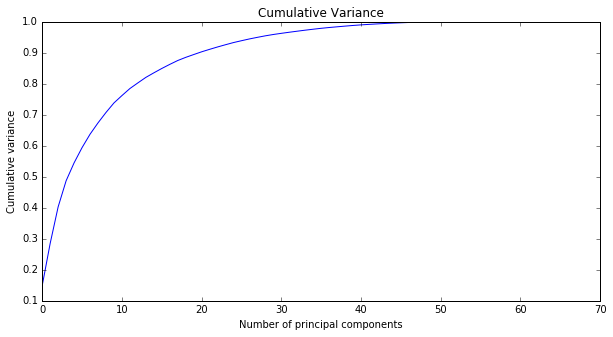

In [11]:
import matplotlib.pyplot as plt

## To plot cumulative variance graph to understand how many principal componets are sufficient to explain the variance
cumulative_explained = np.cumsum(pca_digits.explained_variance_ratio_) 
plt.figure(figsize=(10,5))
plt.plot(cumulative_explained)
plt.ylabel('Cumulative variance')
plt.xlabel('Number of principal components')
plt.title('Cumulative Variance')

In [12]:
## From the graph above, 30 components seem to explain over 95% of the variance. Hence choosing the componets = 30
# Rerun the PCA with 30 components

X,y = digits.data, digits.target
pca_digits1=PCA(n_components = 30)

## Print the shape of the data before and after PCA
X_proj1 = pca_digits1.fit_transform(X)
print 'Shape before PCA' ,X.shape , '\n'
print 'Shape after PCA',X_proj1.shape

Shape before PCA (1797, 64) 

Shape after PCA (1797, 30)


In [13]:
## Reconstructing after applying PCA to see how efficient the model is

X_inv_proj1 = pca_digits1.inverse_transform(X_proj1)

In [14]:
## Print the shape of the reconstructed image

shape(X_inv_proj1)

(1797, 64)

In [15]:
## Reshape the reconstructed data to enable printing as an image

X_proj_img1 = np.reshape(X_inv_proj1,(1797,8,8))

Shape of the matrix before applying PCA (1797, 64)
Shape of the matrix after applying PCA (1797, 30)
Variance captured by using 30 principal components =  95.91 %
Amount of information thrown away by applying PCA =  4.09 %


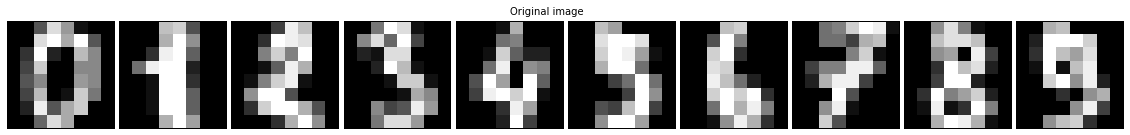

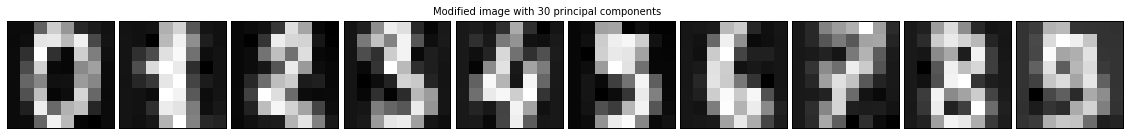

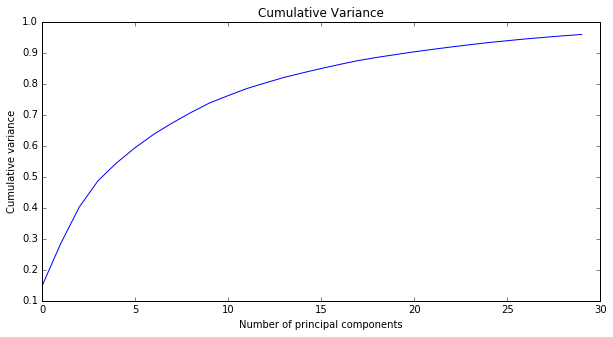

In [16]:
## Plotting original and modified images together to compare and understand the effciency of the PCA

# Plot the original images
num_columns = 10
num_rows = 1
fig = plt.figure(figsize=(num_columns * 2, 2.0 * num_rows))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(num_columns * num_rows):
    ax = fig.add_subplot(num_rows, num_columns, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.suptitle('Original image')
    
# Plot the modified images    
fig = plt.figure(figsize=(num_columns * 2, 2.0 * num_rows))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(num_columns * num_rows):
    ax = fig.add_subplot(num_rows, num_columns, i + 1, xticks=[], yticks=[])
    ax.imshow(X_proj_img1[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.suptitle('Modified image with 30 principal components')
    
# Shape of the matrices before and after application of PCA    
print 'Shape of the matrix before applying PCA', X.shape
print 'Shape of the matrix after applying PCA', X_proj1.shape    

# Cumulative variance graph
cumulative_explained1 = np.cumsum(pca_digits1.explained_variance_ratio_) 
plt.figure(figsize=(10,5))
plt.plot(cumulative_explained1)
plt.ylabel('Cumulative variance')
plt.xlabel('Number of principal components')
plt.title('Cumulative Variance')

# Calculate the amount of information thrown away
cumulative_explained1 = np.cumsum(pca_digits1.explained_variance_ratio_)
print 'Variance captured by using 30 principal components = ', round(cumulative_explained1.max()*100,2) , '%'    
print 'Amount of information thrown away by applying PCA = ', (100-round(cumulative_explained1.max()*100,2)) , '%'    